<a href="https://colab.research.google.com/github/lowtech1/projectflow/blob/main/satellite_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/satimage_csv.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


Loại dữ liệu: Hình ảnh vệ tinh

Nguồn: Vệ tinh Landsat

Nội dung: Bộ dữ liệu chứa thông tin về "giá trị đa phổ" của các điểm ảnh trong vùng lân cận 3x3 của ảnh vệ tinh.

1      red soil      
2      cotton crop
3      grey soil
4      damp grey soil
5      soil with vegetation stubble
6      mixture class (all types present)
7      very damp grey soil

1. Sử dụng biểu đồ Histogram biểu diễn của thuộc tính thứ 1, 7


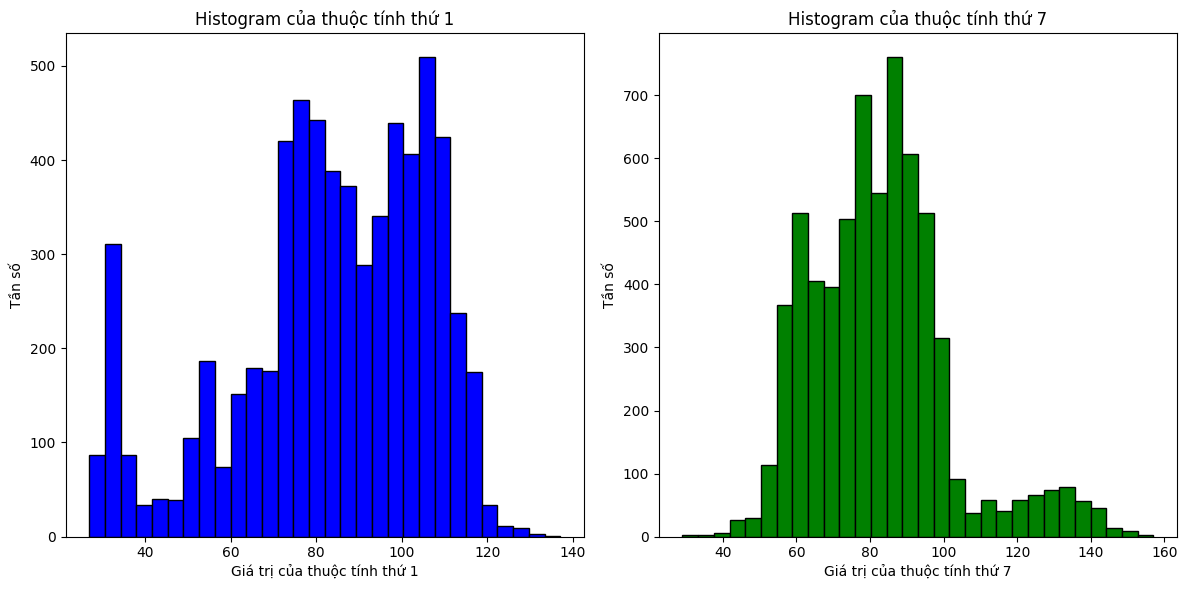

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu (thay thế 'landsat_data.csv' bằng tên file của bạn)
data = pd.read_csv('satimage_csv.csv')

# Vẽ histogram cho thuộc tính thứ 1 và 7
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['1'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Giá trị của thuộc tính thứ 1')
plt.ylabel('Tần số')
plt.title('Histogram của thuộc tính thứ 1')

plt.subplot(1, 2, 2)
plt.hist(data['7'], bins=30, color='green', edgecolor='black')
plt.xlabel('Giá trị của thuộc tính thứ 7')
plt.ylabel('Tần số')
plt.title('Histogram của thuộc tính thứ 7')

plt.tight_layout()
plt.show()

1  Có nhiều đỉnh, cho thấy dữ liệu có thể được chia thành nhiều nhóm.

7  Đỉnh lệch về một bên, cho thấy dữ liệu tập trung nhiều ở một phía.

2. Sử dụng biểu đồ Boxplot biểu diễn của thuộc tính thứ 13, 24

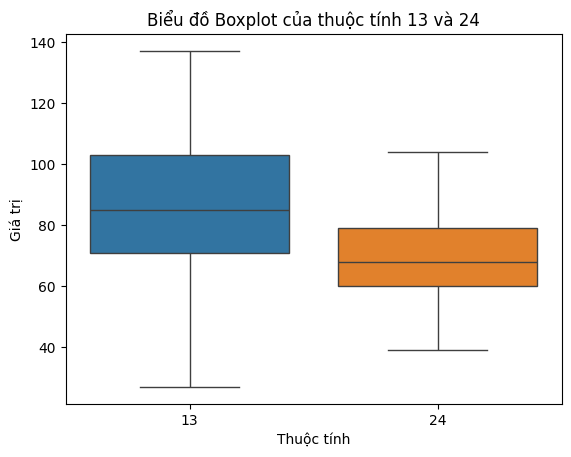

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ boxplot cho thuộc tính thứ 13 và 24
sns.boxplot(data[['13', '24']])
plt.xlabel('Thuộc tính')
plt.ylabel('Giá trị')
plt.title('Biểu đồ Boxplot của thuộc tính 13 và 24')
plt.show()

Giá trị trung vị của 13 là 84 còn 24 là 65

Độ phân tán của 13 là từ 65-105 còn 24 là từ 60-80

Không có giá trị ngoại lệ


3. Sử dụng biểu đồ Boxplot biểu diễn của thuộc tính 1 tương ứng mỗi Class tập
Satellite Image.

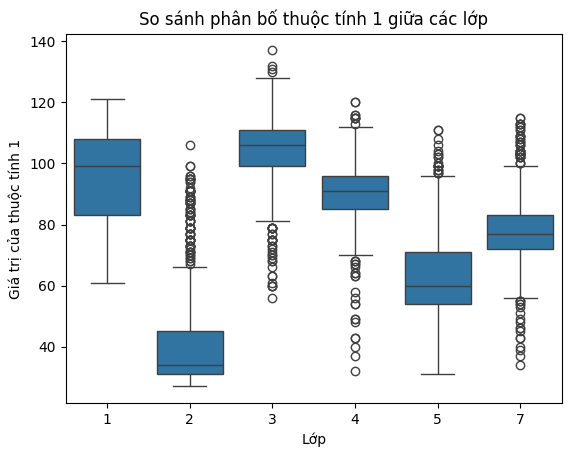

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ boxplot so sánh thuộc tính thứ 1 giữa các lớp
sns.boxplot(x='Class', y='1', data=data)
plt.xlabel('Lớp')
plt.ylabel('Giá trị của thuộc tính 1')
plt.title('So sánh phân bố thuộc tính 1 giữa các lớp')
plt.show()

4. Sử dung biểu đồ tỷ lệ (Pie) tập mẫu phân bố ở các Class.

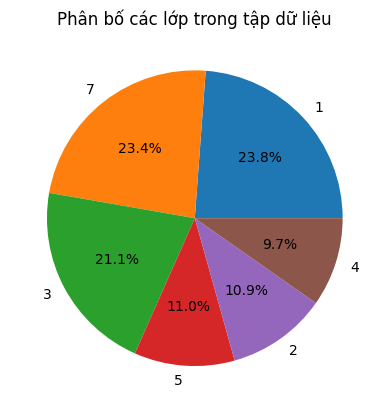

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đếm số lượng mẫu mỗi lớp
class_counts = data['Class'].value_counts()

# Vẽ biểu đồ tỷ lệ
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Phân bố các lớp trong tập dữ liệu')
plt.show()

1 7 3 chiếm tỷ trọng phần lớn với 23.8%, 23.4% và 21.1%

6 không xuất hiện


5. Biểu đồ Scatter plot 2D để thể hiện phân bố Class của 2 thuộc tính 12, 17

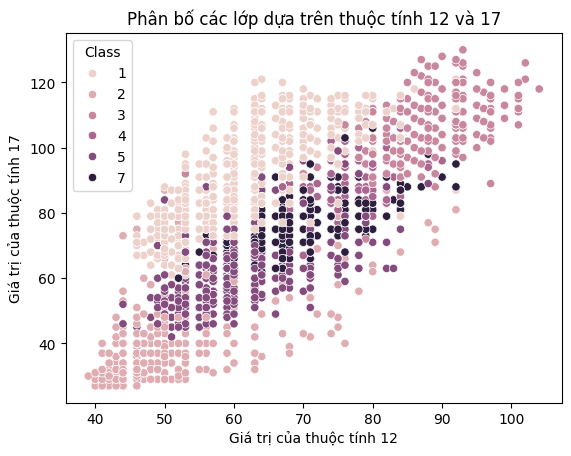

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân tán
sns.scatterplot(x='12', y='17', hue='Class', data=data)
plt.xlabel('Giá trị của thuộc tính 12')
plt.ylabel('Giá trị của thuộc tính 17')
plt.title('Phân bố các lớp dựa trên thuộc tính 12 và 17')
plt.show()

6. Biểu đồ Matrix of scatterplot thể hiện cho 6 thuộc tính từ 7 đến 12 và CLASS

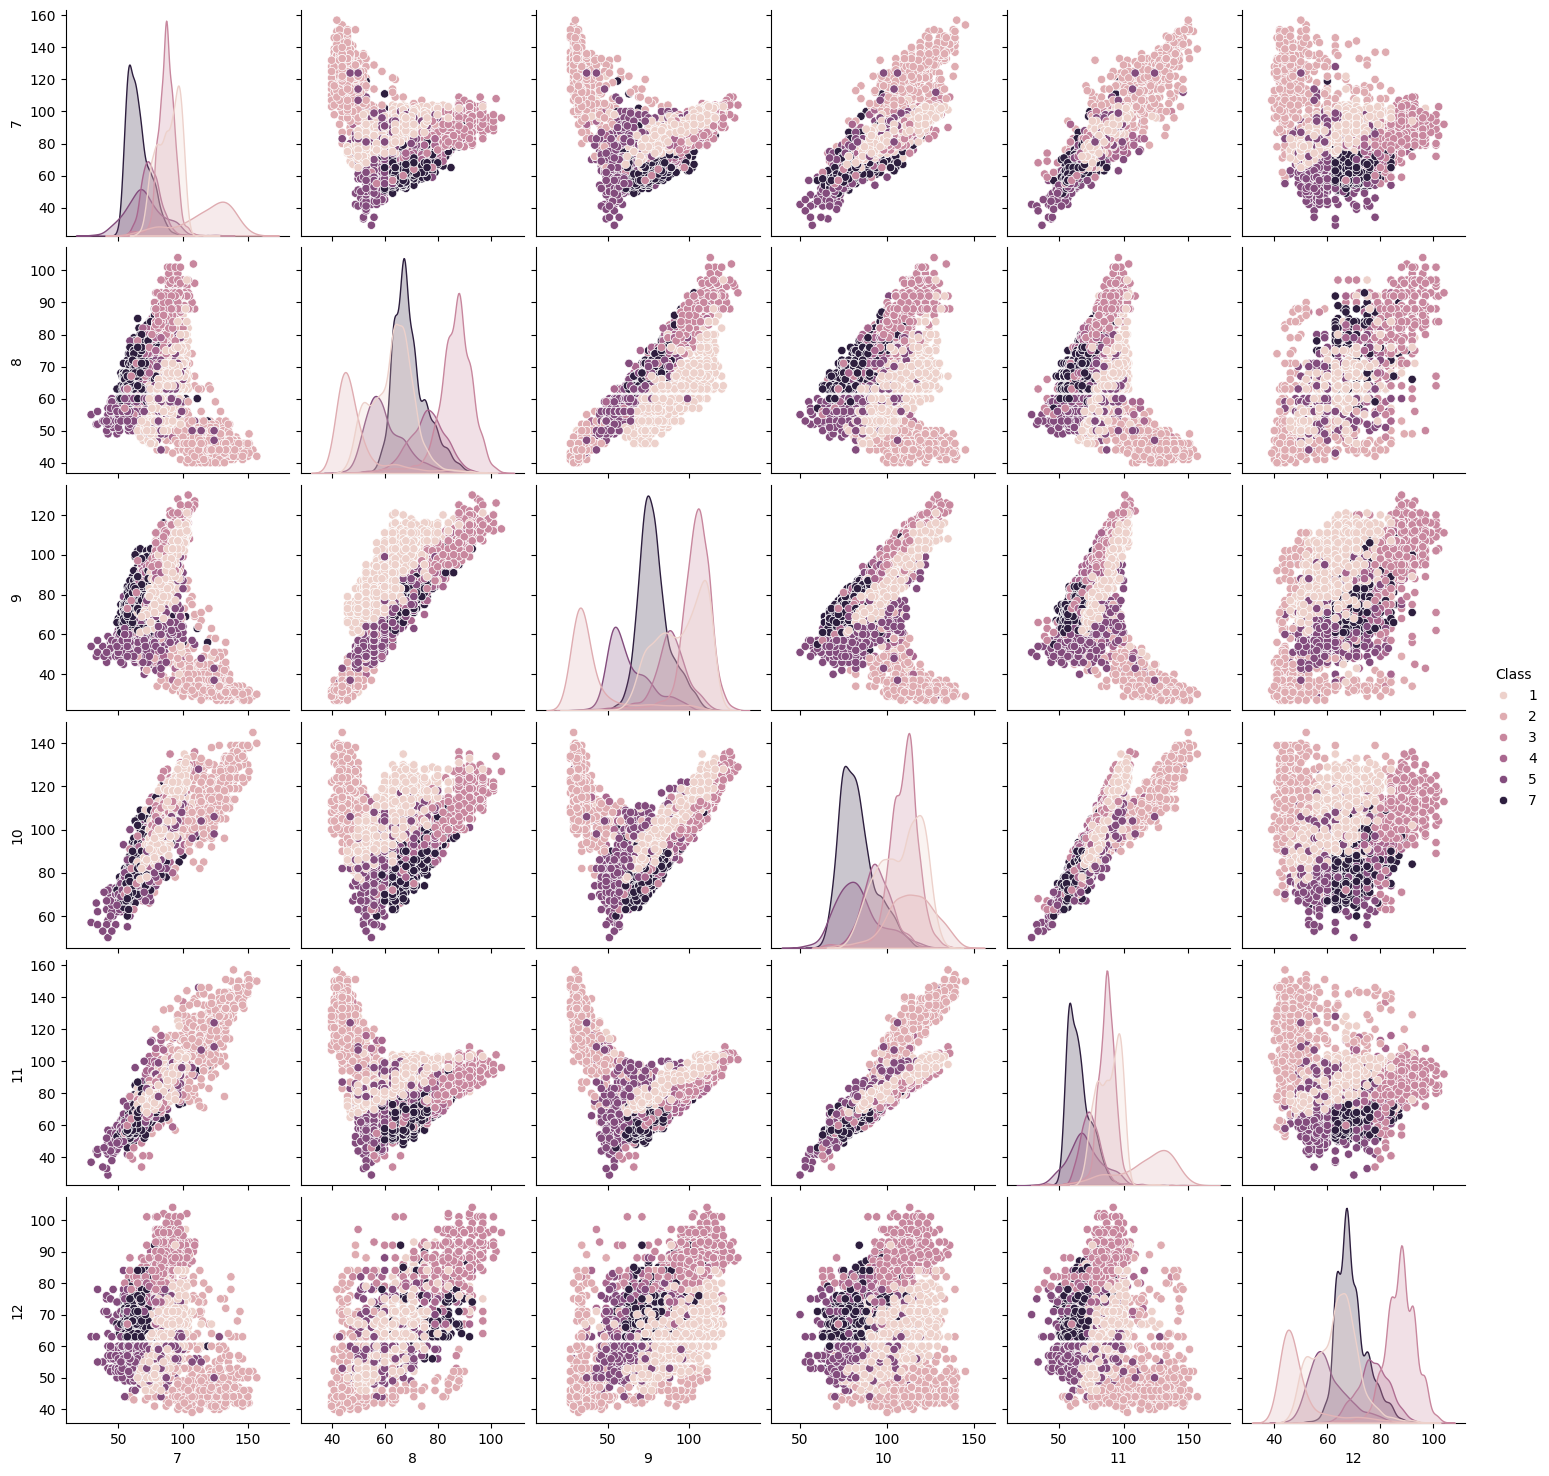

In [ ]:
import pandas as pd
import seaborn as sns

# Chọn các cột cần vẽ
data_subset = data[['7', '8', '9', '10', '11', '12', 'Class']]

# Vẽ biểu đồ ma trận phân tán
sns.pairplot(data_subset, hue='Class')
plt.show()

7. Biểu đồ Parallel coordinates thể hiện cho 36 thuộc tính và thuộc tính Class ,
thuộc tính từ 13 đến 18 và thuộc tính Class

In [ ]:
import pandas as pd
import plotly.express as px

# Vẽ biểu đồ tọa độ song song
fig = px.parallel_coordinates(data, color='Class', dimensions=['13', '14', '15', '16', '17', '18'])
fig.show()

8. Biểu đồ Starglyph thể hiện cho thuộc tính 1 và 6, 1 và 28, 17 và 23 cho các Class.